# Exploratory Data Analysis (EDA)

In this notebook, we perform exploratory data analysis to understand:

- class distributions
- missing values
- data quality issues

## Imports & Configuration

In [40]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path

%matplotlib inline
sns.set(style="whitegrid")


In [41]:
Path.cwd().parents[1]

PosixPath('/Users/napatcholthaipanich/Dev/master/dissertation/workspace/ml')

In [42]:
PATH = os.path.join(Path.cwd().parents[1], "data/interim/rphunter")

## Load Data

In [43]:
total_df = pd.read_csv(os.path.join(PATH, 'total.csv'))
experiment_df = pd.read_csv(os.path.join(PATH, 'experiment.csv'))
combined_df = pd.concat([total_df, experiment_df], ignore_index=True)
combined_df = combined_df.drop_duplicates(ignore_index=True)

## Initial Inspection

In [44]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Project Name                   643 non-null    object 
 1   Chain                          643 non-null    object 
 2   Address                        643 non-null    object 
 3   Open Source                    643 non-null    object 
 4   Source                         643 non-null    object 
 5   Hidden Balance Modification    642 non-null    float64
 6   Hidden Mint/Burn               642 non-null    float64
 7   Address Restrict               643 non-null    int64  
 8   Amount Restrict                643 non-null    int64  
 9   Modifiable External Call       643 non-null    int64  
 10  TimeStamp Restrict             643 non-null    int64  
 11  Hidden Balance Modification.1  643 non-null    int64  
 12  Modifiable External Call.1     643 non-null    int

In [45]:
combined_df.head()

,Project Name,Chain,Address,Open Source,Source,Hidden Balance Modification,Hidden Mint/Burn,Address Restrict,Amount Restrict,Modifiable External Call,TimeStamp Restrict,Hidden Balance Modification.1,Modifiable External Call.1,Modifiable Tax Address,Modifiable Tax Rate
0,GMETA,BSC,0X93023F1D3525E273F291B6F76D2F5027A39BF302,Yes,https://twitter.com/BeosinAlert/status/1681240...,0.0,1.0,0,0,0,0,0,0,0,1
1,Sudorare,ETH,0X5404EFAFDD8CC30053069DF2A1B0C4BA881B3E1E,Yes,https://x.com/PeckShieldAlert/status/156196749...,0.0,1.0,0,0,0,0,0,0,0,0
2,DRAC Network,ETH,0X10F6F2B97F3AB29583D9D38BABF2994DF7220C21,Yes,https://twitter.com/PeckShieldAlert/status/155...,0.0,1.0,0,0,0,0,0,0,0,1
3,DHE,BSC,0X11CBC781DADAAD13FC3A361772C80B1C027820AF,Yes,https://twitter.com/CertiKAlert/status/1539031...,0.0,0.0,1,0,0,0,0,0,0,0
4,ElonMVP,BSC,0X3E597EA168A85AA2AE5E2C4333665BCD875ED10F,Yes,https://twitter.com/PeckShieldAlert/status/153...,0.0,0.0,1,0,0,0,0,0,0,0


In [46]:
combined_df.describe()

,Hidden Balance Modification,Hidden Mint/Burn,Address Restrict,Amount Restrict,Modifiable External Call,TimeStamp Restrict,Hidden Balance Modification.1,Modifiable External Call.1,Modifiable Tax Address,Modifiable Tax Rate
count,642.000000,642.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,0.133956,0.397196,0.323484,0.233281,0.003110,0.032659,0.001555,0.101089,0.062208,0.183515
std,0.340871,0.489699,0.468170,0.423249,0.055728,0.177882,0.039436,0.301681,0.241722,0.387389
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
combined_df.columns

Index(['Project Name', 'Chain', 'Address', 'Open Source', 'Source',
       'Hidden Balance Modification', 'Hidden Mint/Burn', 'Address Restrict',
       'Amount Restrict', 'Modifiable External Call', 'TimeStamp Restrict',
       'Hidden Balance Modification.1', 'Modifiable External Call.1',
       'Modifiable Tax Address', 'Modifiable Tax Rate'],
      dtype='object')

In [48]:
column_merge_map = {
    "Hidden Balance Modification": ["Hidden Balance Modification", "Hidden Balance Modification.1"],
    "Modifiable External Call": ["Modifiable External Call", "Modifiable External Call.1"],
}

# Merge by summing values across duplicates
for new_col, col_variants in column_merge_map.items():
    combined_df[new_col] = combined_df[col_variants].sum(axis=1)
    combined_df.drop(columns=[col for col in col_variants if col != new_col], inplace=True)

In [49]:
combined_df.columns

Index(['Project Name', 'Chain', 'Address', 'Open Source', 'Source',
       'Hidden Balance Modification', 'Hidden Mint/Burn', 'Address Restrict',
       'Amount Restrict', 'Modifiable External Call', 'TimeStamp Restrict',
       'Modifiable Tax Address', 'Modifiable Tax Rate'],
      dtype='object')

## Labels Distribution

In [50]:
target_labels = [   'Hidden Balance Modification', 'Hidden Mint/Burn', 'Address Restrict',
       'Amount Restrict', 'Modifiable External Call', 'TimeStamp Restrict',
       'Modifiable Tax Address', 'Modifiable Tax Rate']
label_counts = combined_df[target_labels].sum()
label_counts

Hidden Balance Modification     87.0
Hidden Mint/Burn               255.0
Address Restrict               208.0
Amount Restrict                150.0
Modifiable External Call        67.0
TimeStamp Restrict              21.0
Modifiable Tax Address          40.0
Modifiable Tax Rate            118.0
dtype: float64

#### Bar Plot of Multi-Label Frequency

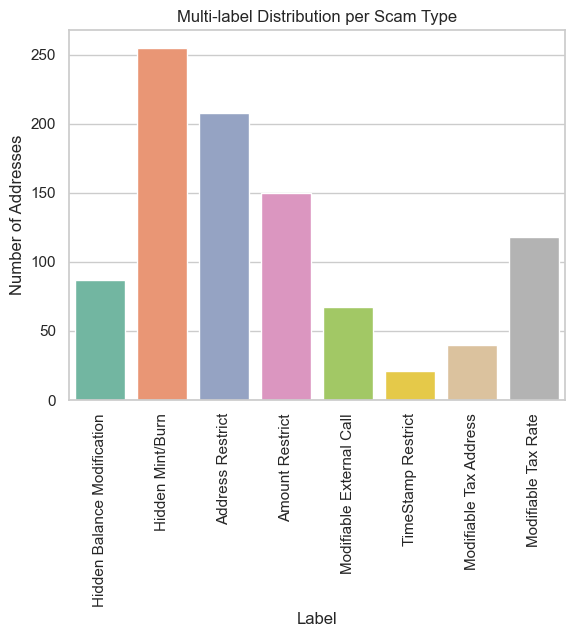

In [51]:
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Multi-label Distribution per Scam Type")
plt.xlabel("Label")
plt.ylabel("Number of Addresses")
plt.xticks(rotation=90)
plt.show()

#### Plot Count of Label Combinations

In [52]:
# Convert one-hot columns to label strings
def get_labels(row):
    return ','.join([
        label for label in target_labels
        if row[label] == 1
    ])

combined_df['label_combo'] = combined_df.apply(get_labels, axis=1)
combined_df['label_combo'] = combined_df['label_combo'].replace('', 'None')  # Replace empty with 'None'
# Count combinations
combo_counts = combined_df['label_combo'].value_counts()
combo_counts

label_combo
Hidden Mint/Burn                                                                                       109
Address Restrict                                                                                        52
None                                                                                                    52
Amount Restrict                                                                                         46
Modifiable External Call                                                                                41
Hidden Balance Modification                                                                             37
Hidden Mint/Burn,Address Restrict                                                                       35
Hidden Mint/Burn,Amount Restrict                                                                        25
Modifiable Tax Rate                                                                                     23
Hidden Mint/Burn,Modifiab

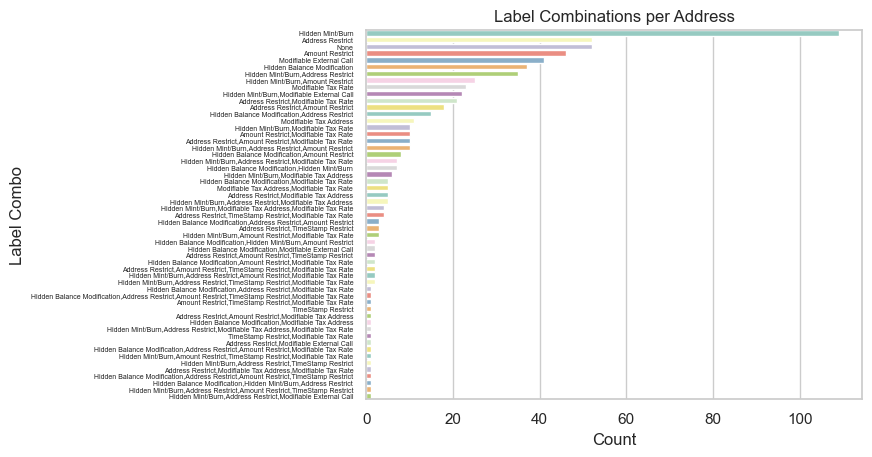

In [53]:
# Plot
sns.barplot(x=combo_counts.values, y=combo_counts.index, palette="Set3")
plt.title("Label Combinations per Address")
plt.xlabel("Count")
plt.ylabel("Label Combo")
plt.yticks(fontsize=5)
plt.show()


## Save Data

In [54]:
combined_df.to_csv(os.path.join(PATH, 'dataset.csv'), index=False)